In [14]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
logs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-belihin-38/shared/homeworks/python_ds_miniprojects/3/logs.csv') 

In [16]:
user_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-belihin-38/shared/homeworks/python_ds_miniprojects/3/user_data.csv') 

In [17]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [18]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [19]:
logs.platform.value_counts()

phone       2753
computer    1505
tablet       242
Name: platform, dtype: int64

In [38]:
logs.query('success == True').groupby('client', as_index= False).agg({'success':'count'}).sort_values('success', ascending = False).head(10).sort_values('client', ascending = True)

,client,success
332,12179,41
810,28719,41
1020,36165,41
1487,52870,41
1758,61468,41
1759,61473,41
1826,64064,40
2231,78349,41
2345,82563,41
2626,92584,41


In [35]:
k = logs.query('success == True').groupby('client', as_index= False).agg({'success':'count'}).sort_values('success', ascending = False).head(10).sort_values('client', ascending = True)

In [36]:
k = k['client'].tolist() # преобразуем столбец в список

In [37]:
print(', '.join(map(str, k))) # объединяем элементы списка в строку через запятую и печатаем

12179, 28719, 36165, 52870, 61468, 61473, 64064, 78349, 82563, 92584


In [39]:
logs.query('success == True').groupby('platform', as_index= False).agg({'success':'count'}).sort_values('success', ascending = False)

,platform,success
1,phone,2019
0,computer,1090
2,tablet,180


In [41]:
merge_df = logs.merge(user_data, how='inner', on = 'client')

In [42]:
merge_df

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [43]:
merge_df.query('success == True and premium == True').groupby('platform', as_index= False).agg({'success':'count'}).sort_values('success', ascending = False)

,platform,success
1,phone,177
0,computer,108
2,tablet,18


In [72]:
q=user_data.query('premium == True')

In [73]:
q_lox=user_data.query('premium == False')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


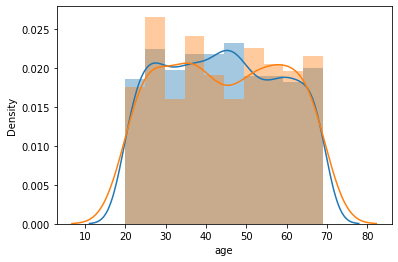

In [78]:
sns.distplot(q_lox.age, bins = 10)
sns.distplot(q.age, bins = 10)


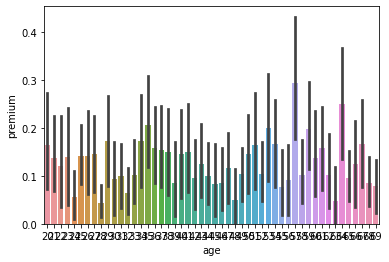

In [49]:
sns.barplot(x="age", y="premium", data=merge_df, order=sorted(merge_df['age'].unique()))

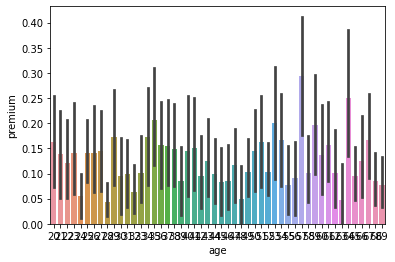

In [51]:
plt.xlim(10, 80)
sns.barplot(x="age", y="premium", data=merge_df)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


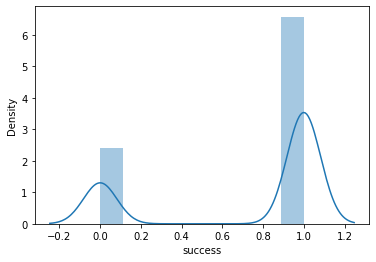

In [87]:
sns.distplot(logs.success)

In [83]:
success_df = logs.query('success == True').groupby('client', as_index= False).agg({'success':'count'}).sort_values('success', ascending = False)

In [107]:
h = success_df.groupby('success').agg({'success':'count'})

In [108]:
h

,success
success,
1,2791
2,43
3,1
40,1
41,9


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


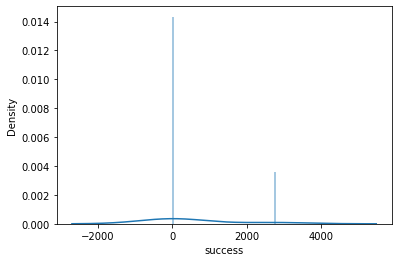

In [109]:
sns.distplot(h.success)

In [110]:
merge_df

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [124]:
success_computer = merge_df.query('success == True and platform == "computer"')

In [125]:
success_computer

,client,success,platform,time,premium,age
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
7,61468,True,computer,1585416826,False,25
11,61468,True,computer,1585428874,False,25
...,...,...,...,...,...,...
3409,4293,True,computer,1585403129,False,29
3425,16540,True,computer,1585456144,False,49
3432,85769,True,computer,1585447052,False,46
3433,81031,True,computer,1585401631,False,45


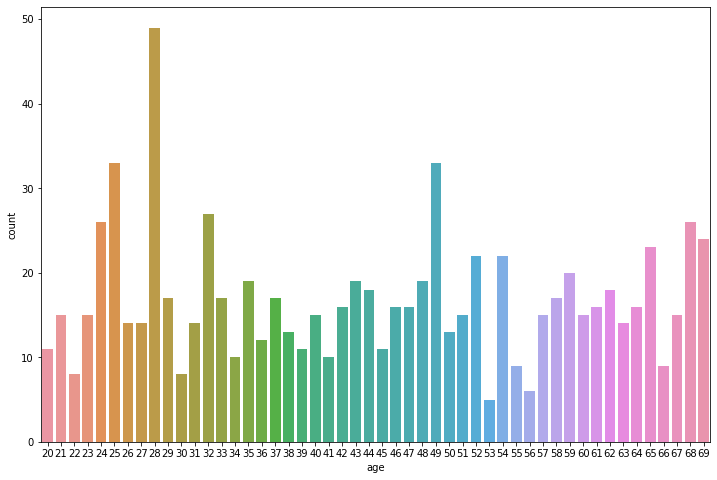

In [133]:
plt.figure(figsize=(12, 8))
sns.countplot(x=success_computer["age"])

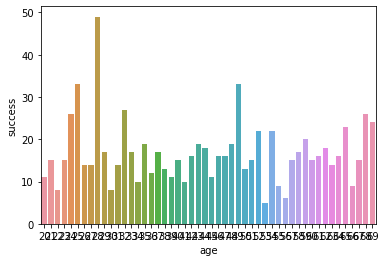

In [120]:
sns.barplot(x="age", y="success", data=success_computer)

In [ ]:
.groupby('client', as_index= False).agg({'success':'count'}).sort_values('success', ascending = False)

In [ ]:

positive_numbers = []
for i in numbers:
    while i > 0:
        positive_numbers.append(i)